In [338]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [339]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("../Web Scraping/predicting_house_price.csv")
df = df.drop(["Unnamed: 0","cooling_type", "heating_type", "lat", "lon"], axis =1)

# Review the DataFrame
df.head()

,city,style,building_type,price,number_of_beds,number_of_baths,extra_space,fire_place
0,Waterdown,Townhouse,Row / Townhouse,749900.0,2,3,0,0
1,Markham,Detached,House,2998000.0,5,8,1,1
2,Toronto,Detached,House,2599900.0,3,4,0,1
3,Mississauga,Semi-Detached,House,2499850.0,4,4,1,0
4,Oakville,Detached,House,1999000.0,5,4,0,1


In [340]:
df['city'].value_counts()

Toronto          77
Ottawa           34
Brampton         32
Mississauga      31
Burlington       28
                 ..
Pembroke          1
Cornwall          1
McGregor          1
Oil Springs       1
New Tecumseth     1
Name: city, Length: 124, dtype: int64

In [341]:
west_df = df

# west_df['city'] = west_df['city'].map({'Toronto': 1, 'Ottawa': 2})


west_df.head()

,city,style,building_type,price,number_of_beds,number_of_baths,extra_space,fire_place
0,Waterdown,Townhouse,Row / Townhouse,749900.0,2,3,0,0
1,Markham,Detached,House,2998000.0,5,8,1,1
2,Toronto,Detached,House,2599900.0,3,4,0,1
3,Mississauga,Semi-Detached,House,2499850.0,4,4,1,0
4,Oakville,Detached,House,1999000.0,5,4,0,1


In [342]:
# west_df['style'].value_counts()

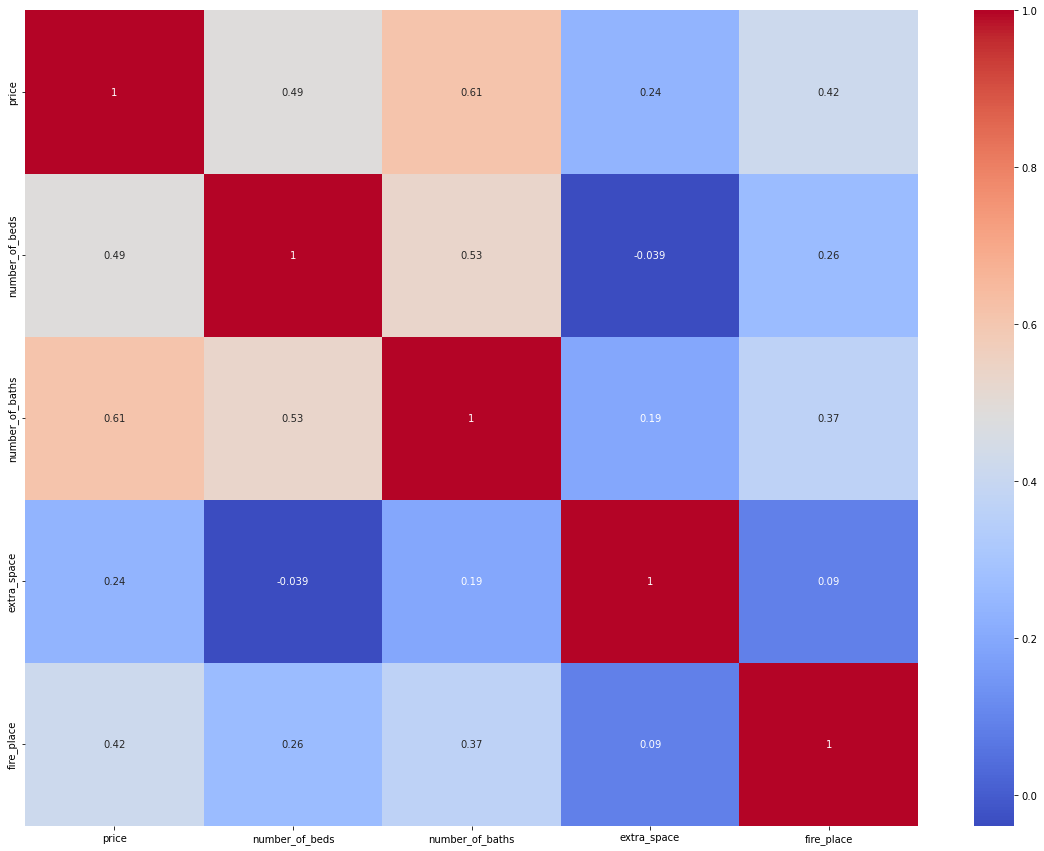

In [343]:
plt.figure(figsize=(20,15))
correlations = west_df.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

In [344]:
# Turn categorical columns to 1's/0's
df_encoded = pd.get_dummies(west_df, columns=['city', 'style', 'building_type'])
west_df = df_encoded


west_df.head()

,price,number_of_beds,number_of_baths,extra_space,fire_place,city_Ajax,city_Alban,city_Alexandria,city_Alnwick/Haldimand,city_Amherstburg,...,city_Whitby,city_Whitchurch-Stouffville,city_Windsor,city_Woodstock,style_Detached,style_Semi-Detached,style_Townhouse,building_type_House,building_type_Mobile Home,building_type_Row / Townhouse
0,749900.0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2998000.0,5,8,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2599900.0,3,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2499850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1999000.0,5,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [345]:
X = StandardScaler().fit_transform(west_df)

In [346]:
y = west_df['price']

In [347]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [348]:
model = DecisionTreeRegressor()

In [349]:
model = model.fit(X_train, y_train)

In [350]:
y_pred = model.predict(X_test)

In [351]:
print(y_pred)

[1898888.  799999. 1099900.  825000. 2195000.  659900. 1299000.  999999.
 1049900. 1649900.  554000.  754900. 1150000. 1070000.  429900. 1349000.
  499000.  779000. 1120000. 1099900.  999000.  545000. 1199900.  650000.
  399900. 1649900.  999888. 1595000.  749000.  999999.  799000. 1898888.
  749000.  719900. 1649900. 1425000. 1350000. 1159900.  799900.  399900.
  645000.  749000.  999888.  999999. 1250000.  545000.  449900. 1225000.
 2599900. 1386000.  699900. 1049000.  999000. 1388000.  899999.  779000.
  899000. 1595000. 1388000.  849900. 1595000.  919900.  899999.  825000.
  699900.  699900. 2599900.  679900.  699900.  499000.  324900.  934900.
  749000.  799900.  399900. 1199000.  545000.  899000.  699000. 1049000.
  865000. 1299000. 2059000.  699000.  699900. 1749900. 1299000.  799900.
  719900.  399900. 1425000.  719900.  645000.  754900.  799900.  499000.
  719900.  779000. 1099900.  309900. 1299900. 1199000. 1299900.  545000.
 1425000. 1049000. 1350000.  554000. 1749900.  7999

In [352]:
# Import relevant metrics from scikit-learn: score, r2, mse, rmse, std
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Compute the metrics for the linear regression model
score = model.score(X_train, y_train, sample_weight=None)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print releveant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 1.0.
The r2 is 0.9929947312280477.
The mean squared error is 2009898753.5790555.
The root mean squared error is 44831.89437865698.
The standard deviation is 533763.7283712854.


In [353]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

scores = cross_val_score(model, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01
